Epoch 0, Loss: 0.6931471785599451
Epoch 100, Loss: 0.3481046452085188
Epoch 200, Loss: 0.2418913519815763
Epoch 300, Loss: 0.1919635637405644
Epoch 400, Loss: 0.16284953788326445
Epoch 500, Loss: 0.14366689360303805
Epoch 600, Loss: 0.1300058830359667
Epoch 700, Loss: 0.11974114886919467
Epoch 800, Loss: 0.11172040549501207
Epoch 900, Loss: 0.1052634829346734
Weights: [-0.69338939  3.04271251 -5.09949597]


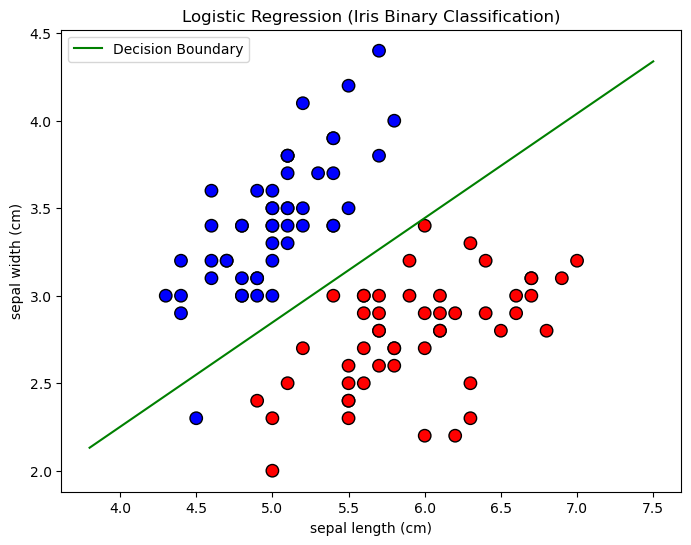

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_logistic(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape
    W = np.zeros(n + 1)
    X_b = np.c_[np.ones((m, 1)), X]

    for epoch in range(epochs):
        z = X_b.dot(W)
        y_pred = sigmoid(z)
        error = y_pred - y
        gradient = (1/m) * X_b.T.dot(error)
        W -= learning_rate * gradient

        if epoch % 100 == 0:
            loss = - (1/m) * np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
            print(f"Epoch {epoch}, Loss: {loss}")

    return W

if __name__ == "__main__":
    iris = load_iris()
    X = iris.data[:100, :2]
    y = iris.target[:100]

    weights = gradient_descent_logistic(X, y, learning_rate=0.1, epochs=1000)

    print("Weights:", weights)

    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=80)

    x_values = [np.min(X[:, 0] - 0.5), np.max(X[:, 0] + 0.5)]
    y_values = -(weights[0] + np.dot(weights[1], x_values)) / weights[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Logistic Regression (Iris Binary Classification)")
    plt.legend()
    plt.show()
